In [1]:
#Correlation between GDP and S&P500

import pandas as pd
sp500 = pd.read_csv('datasets/S&P_500.csv')
sp500.columns = sp500.columns.str.lower()
WorldBank_GDP = pd.read_csv('datasets/WorldBank_GDP.csv')
gdp = WorldBank_GDP[WorldBank_GDP['Country Code'] == 'USA'][['Country Code', 'Year', 'GDP']]
gdp.columns = gdp.columns.str.lower()

#In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the
#returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

#Two tables have been provided for you, named sp500, and gdp. As always, pandas has been imported for you as pd.

# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)
print('\n')

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, how='left', left_on='year', right_on='date', fill_method='ffill')


# Print gdp_sp500
print (gdp_sp500)
print('\n')

# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'returns']]

# Print gdp_returns correlation
print (gdp_returns.corr())

  country code  year           gdp    date  returns
0          USA  2010  1.499210e+13  2010.0    12.78
1          USA  2011  1.554260e+13  2011.0     0.00
2          USA  2012  1.619700e+13  2012.0    13.41
3          USA  2012  1.619700e+13  2012.0    13.41
4          USA  2013  1.678480e+13  2013.0    29.60
5          USA  2014  1.752170e+13  2014.0    11.39
6          USA  2015  1.821930e+13  2015.0    -0.73
7          USA  2016  1.870720e+13  2016.0     9.54
8          USA  2017  1.948540e+13  2017.0    19.42
9          USA  2018  2.049410e+13     NaN      NaN


  country code  year           gdp  date  returns
0          USA  2010  1.499210e+13  2010    12.78
1          USA  2011  1.554260e+13  2011     0.00
2          USA  2012  1.619700e+13  2012    13.41
3          USA  2012  1.619700e+13  2012    13.41
4          USA  2013  1.678480e+13  2013    29.60
5          USA  2014  1.752170e+13  2014    11.39
6          USA  2015  1.821930e+13  2015    -0.73
7          USA  2016  1.87

         date      cpi     seriesid                  data_type  \
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1  2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2  2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3  2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4  2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5  2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6  2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7  2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8  2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9  2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


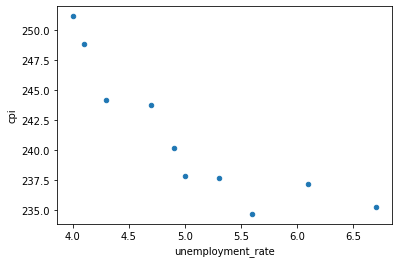

In [2]:
#Phillips curve using merge_ordered()

import pandas as pd
unemployment = pd.read_csv('datasets/unemployment.csv')
inflation = pd.read_csv('datasets/inflation.csv')
import matplotlib.pyplot as plt

#There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse
#relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less
#unemployment.

#You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over
#different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six
#months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

#The tables unemployment and inflation have been loaded for you.

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date', how='inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x='unemployment_rate', y='cpi', kind='scatter')
plt.show()

In [3]:
#merge_ordered() caution, multiple columns

import pandas as pd
gdp = pd.read_csv('datasets/gdp.csv')
gdp['date'] = pd.to_datetime(gdp['date'], format="%Y/%m/%d")
pop = pd.read_csv('datasets/pop.csv')
pop['date'] = pd.to_datetime(pop['date'], format="%Y/%m/%d")

#When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill
#feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population
#data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series
#are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing
#data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

#The tables gdp and pop have been loaded.

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)
print('\n')

# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=['country', 'date'],
                             fill_method='ffill')


# Print date_ctry
print(date_ctry)

         date    country           gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.13240  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-01-01     Sweden   79837.84599  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-04-01  Australia  158263.58160  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-04-01     Sweden   80582.28597  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1990-07-01  Australia  157329.27900  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5  1990-07-01     Sweden   79974.36017  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6  1990-09-01  Australia  158240.67810  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7  1990-09-01     Sweden   80106.49738  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8  1991-01-01  Australia  156195.95350  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9  1991-01-01     Sweden   79524.24192  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10 1991-04-01  Australia  155989.03270  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11 1991-04-01     Sweden   79073.05901  NYGDPMKTPSAKD   8617375 

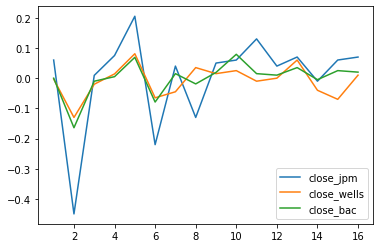

In [4]:
#Using merge_asof() to study stocks

import pandas as pd
jpm = pd.read_csv('datasets/jpm.csv')
jpm['date_time'] = pd.to_datetime(jpm['date_time'], format="%Y/%m/%d %H:%M:%S")
wells = pd.read_csv('datasets/wells.csv')
wells['date_time'] = pd.to_datetime(wells['date_time'], format="%Y/%m/%d %H:%M:%S")
bac = pd.read_csv('datasets/bac.csv')
bac['date_time'] = pd.to_datetime(bac['date_time'], format="%Y/%m/%d %H:%M:%S")
import matplotlib.pyplot as plt

#You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some
#network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM),
#Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to
#JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method
#to compute the price change over time. Finally, plot the price changes so you can review your analysis.

#The three log files have been loaded for you as tables named jpm, wells, and bac.

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))


# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))


# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

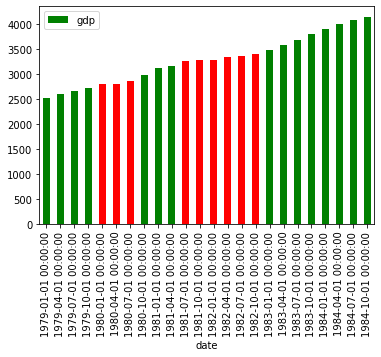

In [5]:
#Using merge_asof() to create dataset

import pandas as pd
gdp1 = pd.read_csv('datasets/gdp1.csv')
gdp1['date'] = pd.to_datetime(gdp1['date'], format="%Y/%m/%d")
recession = pd.read_csv('datasets/recession.csv')
recession['date'] = pd.to_datetime(recession['date'], format="%Y/%m/%d")
import matplotlib.pyplot as plt

#The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use
#them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the
#1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980,
#and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a
#quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

#The tables gdp and recession have been loaded for you.

# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp1, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

In [6]:
#merge_asof() and merge_ordered() differences

#The merge_asof() and merge_ordered() functions are similar in the type of merge they perform and the input arguments they use.
#In this exercise, think about how the functions are different.

#Drag and drop the statement into the appropriate box for either the merge_asof() function, the merge_ordered() function, or
#both if it applies to both functions.

       #merge_asof()                                      #both                                         #.merge_ordered

#After matching two tables, if                #This function can be used when                 #It allows for a right join during
#there are missing values at                  #working with ordered or time-                  #the merge.
#the top of the table from the                #series data.
#right table, this function can                                                               #If it cannot match the rows of
#fill them in.                                #This function can set the suffix               #the tables exactly, it can use
                                              #for overlapping column names.                  #forward fill to interpolate the
#It can be used to do fuzzy                                                                   #missing data.
#matching of dates between
#tables.

#Has an argument that can be
#set to 'forward' to select
#the first row in the right table
#whose key column is greater
#than or equal to the left’s.

In [7]:
#Explore financials with .query()

import pandas as pd
social_fin = pd.read_csv('datasets/social_fin.csv')

#You have been given a table of financial data from some popular social network companies called social_fin. All of the values
#are in thousands of US dollars.

#Use the .query() method and the console to explore social_fin and select the True statement.

print(social_fin.query('value > 50000000'))
print('\n')
print(social_fin.query('company == "facebook" and financial == "total_revenue"'))
print('\n')
print(social_fin.query('financial == "net_income" and value < 0'))
print('\n')
print(social_fin.query('financial == "gross_profit" and value > 100'))

#There 2 rows where the value is greater than $50,000,000K.

#There are 3 rows for total revenue for Facebook.

#There are 6 rows where the net income has a negative value.*

#There are 45 rows, where the gross profit is greater than $100K.

        financial   company  year     value
5   total_revenue  facebook  2019  70697000
7    gross_profit  facebook  2019  57927000
20  total_revenue  facebook  2018  55838000


        financial   company  year     value
5   total_revenue  facebook  2019  70697000
20  total_revenue  facebook  2018  55838000
35  total_revenue  facebook  2017  40653000
50  total_revenue  facebook  2016  27638000


     financial  company  year    value
14  net_income     snap  2019 -1033660
29  net_income     snap  2018 -1255911
34  net_income  twitter  2017  -108063
44  net_income     snap  2017 -3445066
49  net_income  twitter  2016  -456873
59  net_income     snap  2016  -514643


       financial   company  year     value
2   gross_profit   twitter  2019   2322288
7   gross_profit  facebook  2019  57927000
12  gross_profit      snap  2019    819696
17  gross_profit   twitter  2018   2077362
22  gross_profit  facebook  2018  46483000
27  gross_profit      snap  2018    381581
32  gross_profit   twitt

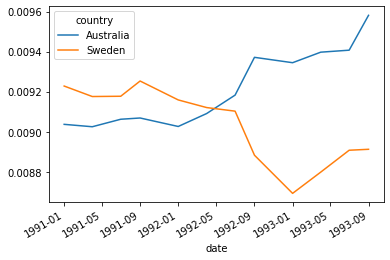

In [8]:
#Subsetting rows with .query()

import pandas as pd
gdp = pd.read_csv('datasets/gdp.csv')
gdp['date'] = pd.to_datetime(gdp['date'], format="%Y/%m/%d")
pop = pd.read_csv('datasets/pop.csv')
pop['date'] = pd.to_datetime(pop['date'], format="%Y/%m/%d")
import matplotlib.pyplot as plt

#In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using
#the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to
#sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

#The tables gdp and pop have been loaded for you.

# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot()
plt.show()

In [9]:
#Select the right .melt() arguments

import pandas as pd
inflation1 = pd.read_csv('datasets/inflation1.csv')

#You are given a table named inflation. Chose the option to get the same output as the table below.

#   country    indicator  year  annual
#0   Brazil  Inflation %  2017    3.45
#1   Canada  Inflation %  2017    1.60
#2   France  Inflation %  2017    1.03
#3    India  Inflation %  2017    2.49
#4   Brazil  Inflation %  2018    3.66
#5   Canada  Inflation %  2018    2.27
#6   France  Inflation %  2018    1.85
#7    India  Inflation %  2018    4.86
#8   Brazil  Inflation %  2019    3.73
#9   Canada  Inflation %  2019    1.95
#10  France  Inflation %  2019    1.11
#11   India  Inflation %  2019    7.66

inflation1.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')

#inflation.melt(id_vars=['country','indicator'], var_name='annual')

#inflation.melt(id_vars=['country'], var_name='indicator', value_name='annual')

#inflation.melt(id_vars=['country','indicator'], var_name='year', value_name='annual')*

#inflation.melt(id_vars=['country'], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


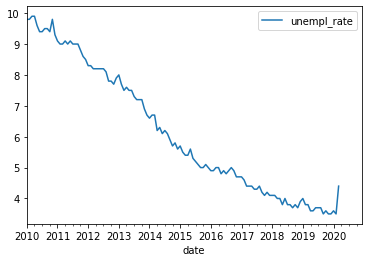

In [10]:
#Using .melt() to reshape government data

import pandas as pd
ur_wide = pd.read_csv('datasets/ur_wide.csv')
ur_wide = ur_wide.astype({"year": str})
import matplotlib.pyplot as plt

#The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for
#each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over
#time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot
#using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

#The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the
#console before beginning the exercise.

# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')


# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by='date')

# Plot the unempl_rate by date
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

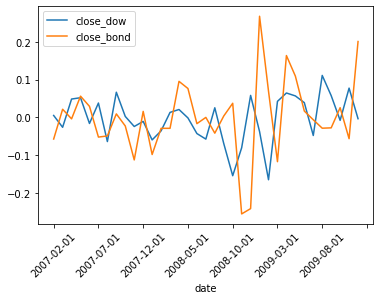

In [11]:
#Using .melt() for stocks vs bond performance

import pandas as pd
ten_yr = pd.read_csv('datasets/ten_yr.csv')
dji = pd.read_csv('datasets/dji.csv')
import matplotlib.pyplot as plt

#It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll
#review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year
#treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt()
#method to reshape this table.

#Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the
#percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

#The tables ten_yr and dji have been loaded for you.

# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=45)
plt.show()